In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum()
titanic_data = titanic_data.drop(columns='Cabin', axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
 titanic_data= titanic_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [ ]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [ ]:
scaler = MinMaxScaler()
scaler.fit(titanic_data)
print(scaler.data_max_)

[  1.       3.       1.      80.       8.       6.     512.3292   2.    ]


In [ ]:
nor = Normalizer().fit(titanic_data)
normali=nor.transform(titanic_data)
normali

array([[0.        , 0.12832206, 0.        , ..., 0.        , 0.31011166,
        0.        ],
       [0.01237466, 0.01237466, 0.01237466, ..., 0.        , 0.88210632,
        0.01237466],
       [0.03651957, 0.10955871, 0.03651957, ..., 0.        , 0.28941759,
        0.        ],
       ...,
       [0.        , 0.07886712, 0.02628904, ..., 0.05257808, 0.61647799,
        0.        ],
       [0.0251657 , 0.0251657 , 0.        , ..., 0.        , 0.75497086,
        0.0251657 ],
       [0.        , 0.09057442, 0.        , ..., 0.        , 0.23398392,
        0.06038295]])

In [ ]:
normali.size

7128

In [ ]:
df=pd.DataFrame(normali ,columns=['survived','pclclass','sex','age','sibsp','parch','fare','emparked'])

In [ ]:
df.describe()

,survived,pclclass,sex,age,sibsp,parch,fare,emparked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.010094,0.072560,0.009456,0.739721,0.012854,0.009539,0.532942,0.010147
std,0.016110,0.046749,0.015550,0.282043,0.027383,0.021337,0.281558,0.020945
min,0.000000,0.001947,0.000000,0.006070,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030340,0.000000,0.579652,0.000000,0.000000,0.279937,0.000000
50%,0.000000,0.073853,0.000000,0.880181,0.000000,0.000000,0.460022,0.000000
75%,0.017583,0.097626,0.016881,0.954206,0.014151,0.000000,0.812511,0.008510
max,0.108650,0.325951,0.089635,0.999688,0.204442,0.122905,0.999829,0.114620


In [ ]:
y=titanic_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
x=df.drop(columns=['survived'], axis=1)
x

,pclclass,sex,age,sibsp,parch,fare,emparked
0,0.128322,0.000000,0.941028,0.042774,0.000000,0.310112,0.000000
1,0.012375,0.012375,0.470237,0.012375,0.000000,0.882106,0.012375
2,0.109559,0.036520,0.949509,0.000000,0.000000,0.289418,0.000000
3,0.015716,0.015716,0.550066,0.015716,0.000000,0.834529,0.000000
4,0.083243,0.000000,0.971173,0.000000,0.000000,0.223370,0.000000
...,...,...,...,...,...,...,...
886,0.066593,0.000000,0.899002,0.000000,0.000000,0.432853,0.000000
887,0.028127,0.028127,0.534417,0.000000,0.000000,0.843816,0.000000
888,0.078867,0.026289,0.780761,0.026289,0.052578,0.616478,0.000000
889,0.025166,0.000000,0.654308,0.000000,0.000000,0.754971,0.025166


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=2)

Regresion 


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy : ', training_data_accuracy)
print("MCC:",matthews_corrcoef(Y_train, X_train_prediction))

Accuracy :  0.7008426966292135
MCC: 0.32653668592062757


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy: ', test_data_accuracy)

Accuracy:  0.6480446927374302


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import matthews_corrcoef
Y_pred = KNN_classifier.predict(X_test)
KNN_accuracy = round(accuracy_score(Y_test, Y_pred), 3)
print("Accuracy:",KNN_accuracy*100)
print("MCC:",matthews_corrcoef(Y_test, Y_pred))

Accuracy: 70.89999999999999
MCC: 0.4050939904653985


SMV

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
clasificador = SVC(kernel='linear')
clasificador.fit(X_train, Y_train)
y_pred2 = clasificador.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred2))
print("MCC:",matthews_corrcoef(Y_test, y_pred2))

Accuracy: 0.6424581005586593
MCC: 0.2639399992266113


El que optuvo mejor desempeño fue utilizando el KNN, el cual obtuvo un desempeño del 71%

# prueba de KNN con test

In [ ]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test = test.drop(columns='Cabin', axis=1)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test['Pclass'].fillna(test['Pclass'].mode()[0], inplace=True)
test['SibSp'].fillna(test['SibSp'].mode()[0], inplace=True)
test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
test= test.drop(columns = ['PassengerId','Name','Ticket'],axis=1)
test['Sex'].fillna(test['Sex'].mode()[0], inplace=True)
test['Parch'].fillna(test['Parch'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [ ]:
nortest = Normalizer().fit(test)
normalitest=nortest.transform(test)
normalitest

array([[0.08436336, 0.        , 0.97017865, ..., 0.        , 0.22016588,
        0.05624224],
       [0.0629802 , 0.0209934 , 0.98668973, ..., 0.        , 0.14695379,
        0.        ],
       [0.03183903, 0.        , 0.98700995, ..., 0.        , 0.15422031,
        0.03183903],
       ...,
       [0.07635263, 0.        , 0.9798587 , ..., 0.        , 0.18451885,
        0.        ],
       [0.09533508, 0.        , 0.96201326, ..., 0.        , 0.25581579,
        0.        ],
       [0.07937943, 0.        , 0.80100702, ..., 0.02645981, 0.59159639,
        0.02645981]])

In [ ]:
dftest=pd.DataFrame(normalitest ,columns=['pclclass','sex','age','sibsp','parch','fare','emparked'])
x=dftest
x

,pclclass,sex,age,sibsp,parch,fare,emparked
0,0.084363,0.000000,0.970179,0.000000,0.000000,0.220166,0.056242
1,0.062980,0.020993,0.986690,0.020993,0.000000,0.146954,0.000000
2,0.031839,0.000000,0.987010,0.000000,0.000000,0.154220,0.031839
3,0.105212,0.000000,0.946909,0.000000,0.000000,0.303800,0.000000
4,0.117944,0.039315,0.864921,0.039315,0.039315,0.483078,0.000000
...,...,...,...,...,...,...,...
413,0.095335,0.000000,0.962013,0.000000,0.000000,0.255816,0.000000
414,0.008644,0.008644,0.337120,0.000000,0.000000,0.941343,0.008644
415,0.076353,0.000000,0.979859,0.000000,0.000000,0.184519,0.000000
416,0.095335,0.000000,0.962013,0.000000,0.000000,0.255816,0.000000


In [ ]:
Y_predtest = KNN_classifier.predict(x)
Y_predtest

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
prueba=pd.DataFrame(Y_predtest ,columns=['Survived'])
prueba

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
idtit = pd.read_csv('/content/gender_submission.csv')
Id=idtit['PassengerId']
result=pd.concat([Id, prueba], axis=1)
result.columns=['PassengerId', 'Survived']

In [ ]:
result.to_csv('prediction.csv', index=False)

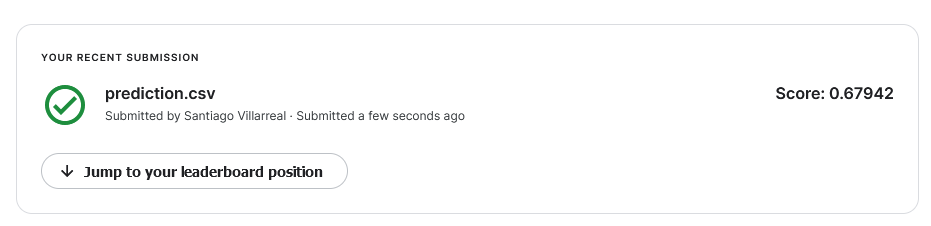